In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pylab as plt
from math import sqrt

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

In [3]:
file_name1 = dir_origen_csv + "Data_filt_horas_ceros.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["datetime"] =  pd.to_datetime(df["fecha"])#transforming "fecha" to datetime
df['dayNumber'] = df['datetime'].dt.dayofweek
df["fecha"] = df["datetime"].dt.date
df.columns

Index(['medidor', 'fecha', 'lectura_id_orig', 'voltajeA', 'voltajeB',
       'voltajeC', 'corrienteA', 'corrienteB', 'corrienteC', 'modelo',
       'angvoltajeA', 'angvoltajeB', 'angvoltajeC', 'angcorrienteA',
       'angcorrienteB', 'angcorrienteC', 'powerfactorsystem', 'totalkwh',
       'totalkvarh', 'Maxkw', 'Maxkvar', 'fechamaxkw', 'fechamaxkvar',
       'frecuencia', 'Latitud', 'Longitud', 'CLASIFICACION', 'kwh_consumido',
       'kvarh_consumido', 'tipo_consumo', 'clasificacion_encoded',
       'modelo_encoded', 'tipo_consumo_encoded', 'kwh_hora', 'dayMonth',
       'hora', 'datetime', 'dayNumber'],
      dtype='object')

## Normalizing kwh_consumido column

In [4]:
df["kwh_consumido"] = (df["kwh_consumido"] - df["kwh_consumido"].min())/(df["kwh_consumido"].max() - df["kwh_consumido"].min()) 

### Max date

In [5]:
max(df.fecha)

datetime.date(2019, 6, 3)

### Min date

In [6]:
min(df.fecha)

datetime.date(2019, 4, 4)

### Range of dates to extract the first week of each month

In [7]:
w1_month1_date1=datetime.date(2019,4,1)
w1_month1_date2=datetime.date(2019,4,7)

w1_month2_date1=datetime.date(2019,4,29)
w1_month2_date2=datetime.date(2019,5,5)

w1_month3_date1=datetime.date(2019,5,27)
w1_month3_date2=datetime.date(2019,6,2)

In [8]:


df['W1_L_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido'] 
df['W1_L_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W1_L_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W1_MA_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W1_MA_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido']
df['W1_MA_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W1_MI_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))&(df['hora']<=18) & (df['hora']>=12) &(df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W1_J_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W1_V_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W1_S_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W1_D_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

### Range of dates to extract the second week of each month

In [9]:
w2_month1_date1=datetime.date(2019,4,8)
w2_month1_date2=datetime.date(2019,4,14)

w2_month2_date1=datetime.date(2019,5,6)
w2_month2_date2=datetime.date(2019,5,12)

w2_month3_date1=datetime.date(2019,6,3)
w2_month3_date2=datetime.date(2019,6,9)

In [10]:
df['W2_L_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))&(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido']
df['W2_L_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W2_L_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W2_MA_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W2_MA_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W2_MA_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido'] 

df['W2_MI_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W2_MI_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W2_MI_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido'] 

df['W2_J_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W2_J_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W2_J_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido'] 

df['W2_V_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W2_V_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W2_V_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W2_S_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W2_S_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W2_S_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W2_D_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W2_D_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W2_D_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido'] 


### Range of dates to extract the third week of each month

In [11]:
w3_month1_date1=datetime.date(2019,4,15)
w3_month1_date2=datetime.date(2019,4,21)

w3_month2_date1=datetime.date(2019,5,13)
w3_month2_date2=datetime.date(2019,5,19)

In [12]:
df['W3_L_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W3_L_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W3_L_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W3_MA_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W3_MA_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W3_MA_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W3_MI_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W3_MI_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W3_MI_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W3_J_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W3_J_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W3_J_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W3_V_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W3_V_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W3_V_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W3_S_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W3_S_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W3_S_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W3_D_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W3_D_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W3_D_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']


### Range of dates to extract the fourth week of each month

In [13]:
w4_month1_date1=datetime.date(2019,4,22)
w4_month1_date2=datetime.date(2019,4,28)

w4_month2_date1=datetime.date(2019,5,20)
w4_month2_date2=datetime.date(2019,5,26)

In [14]:
df['W4_L_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W4_L_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W4_L_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W4_MA_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W4_MA_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W4_MA_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W4_MI_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W4_MI_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W4_MI_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W4_J_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W4_J_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W4_J_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W4_V_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W4_V_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W4_V_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W4_S_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W4_S_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W4_S_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W4_D_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W4_D_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W4_D_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

In [119]:
df_medidor_mes_franjas = df[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()
df_medidor_mes_franjas

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,2.252374,2.357075,2.226056,2.270535,2.260491,2.230750,2.299423,2.533563,2.232496,2.313309,...,0.765576,0.751020,0.757962,0.740724,0.742219,0.746466,0.739439,0.741381,0.749790,0.734983
15029835,0.112068,0.112826,0.112076,0.112063,0.112699,0.112089,0.112063,0.112090,0.112087,0.112704,...,0.021973,0.021456,0.021846,0.022128,0.021990,0.023555,0.028563,0.034310,0.023765,0.021461
15029844,0.082441,0.083936,0.080859,0.082237,0.083717,0.080859,0.082625,0.083897,0.080859,0.082382,...,0.094853,0.095986,0.098260,0.094853,0.096612,0.098066,0.094853,0.096452,0.098298,0.094853
15029846,6.179371,6.366855,5.996794,6.183830,6.348742,5.996794,6.162876,6.362190,5.996794,6.178939,...,3.922855,4.009784,4.226512,3.830326,4.010203,4.224307,3.830326,4.009038,4.178795,3.830326
15029847,0.441687,0.447774,0.436266,0.449917,0.478297,0.436266,0.447972,0.465813,0.436266,0.448732,...,0.332900,0.340523,0.344213,0.332900,0.338171,0.344519,0.332900,0.338443,0.344816,0.332900
15029974,0.015291,0.015362,0.015373,0.015180,0.015224,0.014672,0.015093,0.015110,0.014679,0.014811,...,0.007902,0.008039,0.007994,0.007894,0.008090,0.008273,0.008001,0.008868,0.008512,0.007978
15029977,0.605944,0.603994,0.590609,0.606425,0.602072,0.591389,0.598201,0.619000,0.581730,0.596809,...,0.381490,0.393326,0.391094,0.381875,0.394623,0.396995,0.382716,0.390901,0.390653,0.372563
15842884,0.240687,0.253847,0.248588,0.238955,0.253043,0.245355,0.237662,0.263071,0.243283,0.244738,...,0.128687,0.118230,0.143327,0.124028,0.120335,0.128682,0.125238,0.118230,0.143017,0.122800
15842885,0.128151,0.129104,0.124035,0.128213,0.137191,0.124035,0.128379,0.135390,0.124035,0.128671,...,0.110620,0.114688,0.115741,0.110620,0.111046,0.111464,0.110620,0.111143,0.111440,0.110620


In [121]:
df_medidor_mes_franjas.isnull()

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029846,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15842884,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15842885,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
df_medidor_mes_franjas.isnull().sum().sum().sum()

0

In [172]:
df=df.groupby('medidor').sum()
df.iloc[0,:30]

lectura_id_orig          4.128716e+08
voltajeA                 3.637670e+04
voltajeB                 3.735396e+04
voltajeC                 3.651256e+04
corrienteA               7.590087e+02
corrienteB               1.823376e+02
corrienteC               3.610853e+02
angvoltajeA              0.000000e+00
angvoltajeB              3.834000e+04
angvoltajeC              7.647000e+04
angcorrienteA            8.838580e+04
angcorrienteB            2.282606e+04
angcorrienteC            5.402575e+04
powerfactorsystem        7.516910e+01
totalkwh                 5.961795e+08
totalkvarh               1.089390e+07
Maxkw                    1.000873e+05
Maxkvar                  1.000873e+05
frecuencia               1.914048e+04
Latitud                 -5.903191e+02
Longitud                -2.532863e+04
kwh_consumido            1.566131e+01
kvarh_consumido          3.086475e+02
clasificacion_encoded    9.570000e+02
modelo_encoded           0.000000e+00
tipo_consumo_encoded     0.000000e+00
kwh_hora    

### CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23), SEMANAS (W1,W2,W3,W4) Y DIAS (L-J, V, S-D) POR MEDIO DE KMeans

k: 1  cost: 9944.148108973519
k: 2  cost: 3026.473334006448
k: 3  cost: 1201.7553967323097
k: 4  cost: 593.6890982159257
k: 5  cost: 342.7524470026787
k: 6  cost: 239.4857559283762
k: 7  cost: 178.43631422648016
k: 8  cost: 133.6198580348293
k: 9  cost: 97.18320944030056


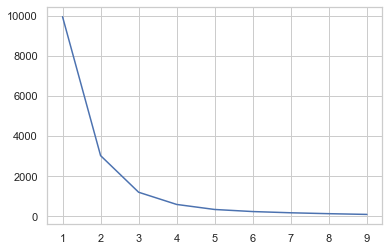

In [91]:
from sklearn.cluster import KMeans
 
A=df_medidor_mes_franjas
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

### Calculating the number of clusters

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=df_medidor_mes_franjas.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [93]:
kmeans.cluster_centers_

array([[7.30757982, 7.50149687],
       [0.24178307, 0.24647866],
       [2.61605294, 2.67771783]])

In [94]:
distance=kmeans.fit_transform(X)
distance

array([[2.91497735e+00, 4.84844425e-01, 7.21250177e+00],
       [1.86249644e-01, 3.58449559e+00, 1.03134787e+01],
       [2.27617967e-01, 3.62586438e+00, 1.03548461e+01],
       [8.52724778e+00, 5.12903181e+00, 1.60008367e+00],
       [2.83692142e-01, 3.11456554e+00, 9.84355100e+00],
       [3.23594193e-01, 3.72184054e+00, 1.04508220e+01],
       [5.10323814e-01, 2.88805617e+00, 9.61704053e+00],
       [7.44941606e-03, 3.39374610e+00, 1.01227171e+01],
       [1.63367946e-01, 3.56161327e+00, 1.02905965e+01],
       [2.01696802e-01, 3.19724268e+00, 9.92617509e+00],
       [1.33690826e-01, 3.53193534e+00, 1.02609166e+01],
       [8.63090854e+00, 5.23301480e+00, 1.50093732e+00],
       [3.41958080e-01, 3.74020408e+00, 1.04691852e+01],
       [3.43943796e-01, 3.74218980e+00, 1.04711709e+01],
       [2.59790963e-02, 3.42395002e+00, 1.01529260e+01],
       [4.11811951e-02, 3.43942240e+00, 1.01684039e+01],
       [3.39156630e-01, 3.73740278e+00, 1.04663840e+01],
       [3.30898993e-01, 3.72914

In [95]:
labels=kmeans.labels_
labels

array([1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0])

In [131]:
df_consumo_mes_franjas = df
df['ClustersConsumoMesFranjas'] = labels


In [132]:
grupo0 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==0,:]

In [133]:
grupo1 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==1,:]

In [134]:
grupo2 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==2,:]

In [135]:
display(grupo0, grupo1, grupo2)

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,463723696,45072.8813,44645.4127,45455.8536,57.7766,41.1345,53.3160,0.0,86160.0,43080.0,...,0.021456,0.021846,0.022128,0.021990,0.023555,0.028563,0.034310,0.023765,0.021461,0
15029844,458715534,96837.3603,95313.3910,95870.0625,21.1828,16.2004,23.4268,0.0,42630.0,85170.0,...,0.095986,0.098260,0.094853,0.096612,0.098066,0.094853,0.096452,0.098298,0.094853,0
15029847,451777209,43318.1621,43511.5646,43032.0922,184.2127,163.7218,182.1528,0.0,84000.0,42000.0,...,0.340523,0.344213,0.332900,0.338171,0.344519,0.332900,0.338443,0.344816,0.332900,0
15029974,438444381,37648.9655,36934.0517,36744.7811,457.2179,427.6216,353.2458,0.0,81600.0,40800.0,...,0.008039,0.007994,0.007894,0.008090,0.008273,0.008001,0.008868,0.008512,0.007978,0
15029977,480658565,98332.5793,99145.0519,97402.6693,245.3114,265.2998,239.5734,0.0,89280.0,44640.0,...,0.393326,0.391094,0.381875,0.394623,0.396995,0.382716,0.390901,0.390653,0.372563,0
15842884,295166078,53454.2940,0.0000,0.0000,7678.1220,0.0000,0.0000,0.0,0.0,0.0,...,0.118230,0.143327,0.124028,0.120335,0.128682,0.125238,0.118230,0.143017,0.122800,0
15842885,459408503,87819.5090,0.0000,0.0000,6610.3490,0.0000,0.0000,0.0,0.0,0.0,...,0.114688,0.115741,0.110620,0.111046,0.111464,0.110620,0.111143,0.111440,0.110620,0
15842894,462638681,88903.3250,0.0000,0.0000,18154.0270,0.0000,0.0000,0.0,0.0,0.0,...,0.232841,0.267148,0.229141,0.234614,0.270708,0.229141,0.230807,0.233710,0.229141,0
15842921,250202782,43719.7480,0.0000,0.0000,3186.5660,0.0000,0.0000,0.0,0.0,0.0,...,0.077789,0.081486,0.074523,0.079018,0.079668,0.074523,0.076354,0.079377,0.076284,0


,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,412871571,36376.7003,37353.9624,36512.5610,759.0087,182.3376,361.0853,0.0,38340.0,76470.0,...,0.751020,0.757962,0.740724,0.742219,0.746466,0.739439,0.741381,0.749790,0.734983,1
16951212,435794991,35480.9916,36757.4351,36892.4147,309.1415,387.2471,386.3998,0.0,40440.0,80880.0,...,1.929037,2.059327,1.866740,1.912743,2.057158,1.866740,1.920773,2.011060,1.866740,1
52073201,209832941,18055.1000,20281.2000,17751.3000,46.2000,43.5000,57.4000,0.0,39089.1,19185.4,...,1.869155,2.117798,1.828572,1.921850,1.958023,1.828572,1.848152,1.830384,1.834913,1
52073218,233829677,22611.1000,22792.3000,22855.6000,224.1000,194.6000,198.6000,0.0,43506.8,21679.7,...,1.055337,1.137156,1.029428,1.058480,1.159923,1.029428,1.057230,1.153084,1.029428,1
52073321,314684338,30988.9000,31512.5000,31119.6000,666.0000,545.6000,675.2000,0.0,29467.1,58684.4,...,2.251016,2.272187,2.220135,2.232026,2.259471,2.220135,2.231435,2.260264,2.220135,1
53307830,236197662,19712.0000,19842.2000,20223.8000,41.6000,42.8000,39.5000,0.0,21690.7,43840.5,...,2.077694,2.156762,2.018178,2.070158,2.133317,2.018178,2.067712,2.127281,2.018178,1
58706706,463626910,45310.7000,45635.2000,46179.5000,570.5000,573.7000,635.3000,0.0,42746.6,86124.0,...,1.228528,1.260955,1.218242,1.253170,1.277401,1.215260,1.242384,1.277633,1.219796,1


,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029846,471403163,42574.4174,39483.6803,39512.1753,851.9113,1113.5127,1110.2617,0.0,43800.0,87600.0,...,4.009784,4.226512,3.830326,4.010203,4.224307,3.830326,4.009038,4.178795,3.830326,2
16567733,376726799,33511.8684,31665.9991,31354.8547,308.0856,375.2734,365.1556,0.0,34560.0,69120.0,...,3.541580,3.792223,3.309887,3.529527,3.772828,3.309887,3.325485,3.338074,3.309887,2
58706725,309100789,26645.4000,26401.5000,26166.6000,159.5000,185.6000,122.3000,0.0,57124.9,28668.0,...,6.411351,6.695752,6.361228,6.409369,6.638075,6.361228,6.409387,6.636308,6.361228,2


In [145]:
grupo0.iloc[1,30:-1]

W1_L_m     0.082441
W1_L_t     0.083936
W1_L_n     0.080859
W1_MA_m    0.082237
W1_MA_t    0.083717
W1_MA_n    0.080859
W1_MI_m    0.082625
W1_MI_t    0.083897
W1_MI_n    0.080859
W1_J_m     0.082382
W1_J_t     0.083042
W1_J_n     0.081589
W1_V_m     0.082199
W1_V_t     0.083216
W1_V_n     0.081578
W1_S_m     0.100875
W1_S_t     0.083037
W1_S_n     0.081597
W1_D_m     0.082534
W1_D_t     0.082880
W1_D_n     0.081589
W2_L_m     0.076244
W2_L_t     0.077093
W2_L_n     0.075600
W2_MA_m    0.026368
W2_MA_t    0.027447
W2_MA_n    0.024462
W2_MI_m    0.026570
W2_MI_t    0.025951
W2_MI_n    0.024462
             ...   
W3_V_m     0.096408
W3_V_t     0.091564
W3_V_n     0.079536
W3_S_m     0.083197
W3_S_t     0.085465
W3_S_n     0.079536
W3_D_m     0.079536
W3_D_t     0.096234
W3_D_n     0.079536
W4_L_m     0.098133
W4_L_t     0.100297
W4_L_n     0.094853
W4_MA_m    0.097801
W4_MA_t    0.098815
W4_MA_n    0.094853
W4_MI_m    0.096816
W4_MI_t    0.098435
W4_MI_n    0.094853
W4_J_m     0.097030


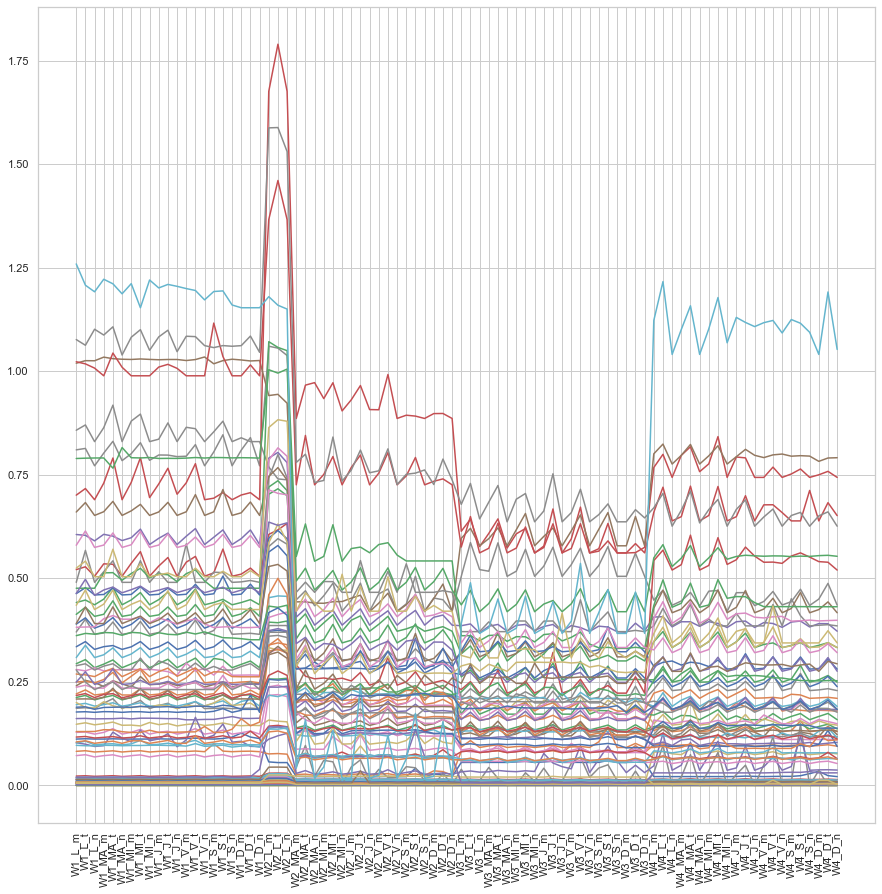

In [146]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90 )
for i in range(len(grupo0)):
    serie=grupo0.iloc[i,30:-1]  
    plt.plot(serie)

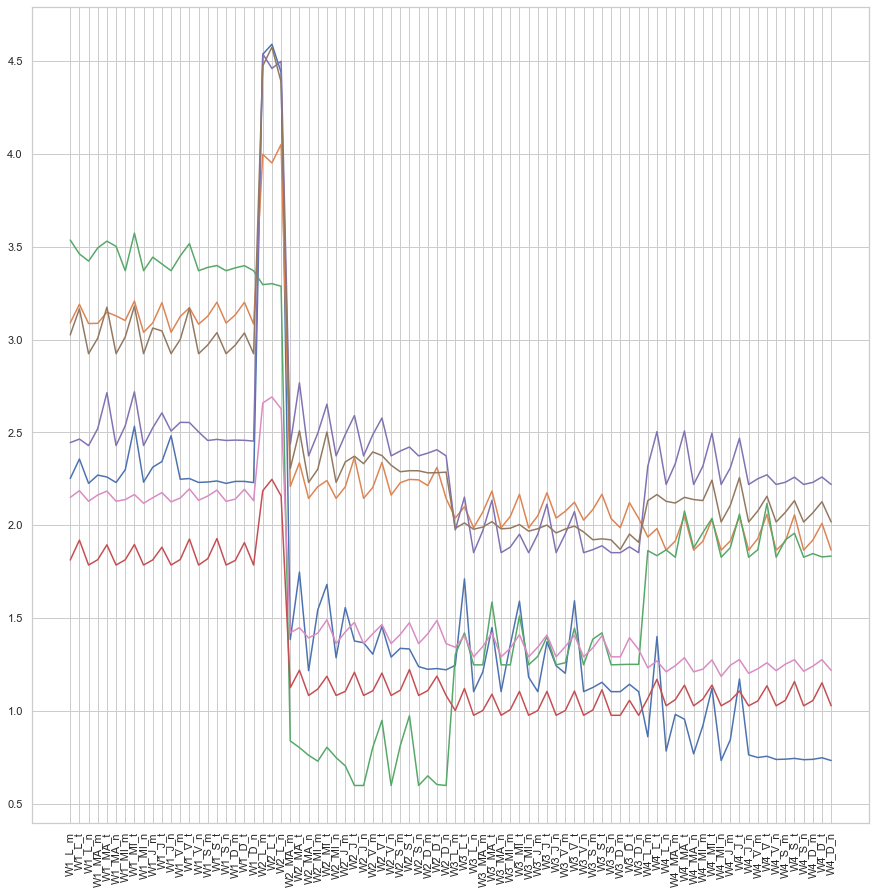

In [147]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90 )
for i in range(len(grupo1)):
    serie=grupo1.iloc[i,30:-1]
    #serie=(serie-serie.min())/(serie.max()-serie.min())
    plt.plot(serie)

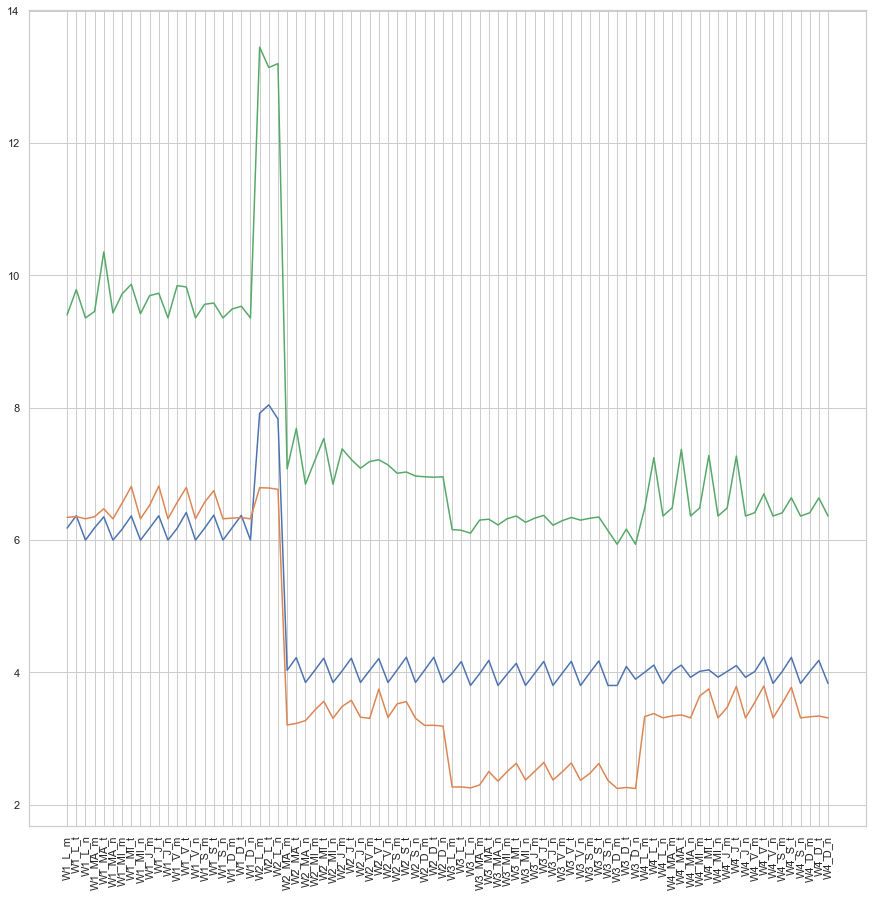

In [148]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90 )
for i in range(len(grupo2)):
    serie=grupo2.iloc[i,30:-1]
    plt.plot(serie)

### First cluster

In [169]:
grupo0.iloc[0,:30]

lectura_id_orig          4.637237e+08
voltajeA                 4.507288e+04
voltajeB                 4.464541e+04
voltajeC                 4.545585e+04
corrienteA               5.777660e+01
corrienteB               4.113450e+01
corrienteC               5.331600e+01
angvoltajeA              0.000000e+00
angvoltajeB              8.616000e+04
angvoltajeC              4.308000e+04
angcorrienteA            3.641637e+04
angcorrienteB            8.723701e+04
angcorrienteC            3.489109e+04
powerfactorsystem        2.986892e+02
totalkwh                 1.527841e+07
totalkvarh               4.166301e+06
Maxkw                    7.850328e+03
Maxkvar                  7.850328e+03
frecuencia               2.153933e+04
Latitud                 -5.630735e+02
Longitud                -2.853091e+04
kwh_consumido            3.318014e-01
kvarh_consumido          4.083240e+02
clasificacion_encoded    2.513000e+03
modelo_encoded           0.000000e+00
tipo_consumo_encoded     0.000000e+00
kwh_hora    

### CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23), SEMANAS (W1,W2,W3,W4) Y DIAS (L-J, V, S-D) POR MEDIO DE DTW

In [22]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [23]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [24]:
def sse(centroids, indicesSeries, timeSeries):
    sumaI = 0
    countI = 0
    for c in range(len(centroids)):
        suma = 0
        count = 0
        cent = centroids[c]
        try:
          indices = indicesSeries[c]
        except:
          return None
        for i in indices:
            
          s = timeSeries[i]
          suma += DTWDistance(cent,s,5)**2
          count += 1

        #suma = suma / count
        sumaI += suma
        countI +=1
    #sumaI /= countI
    return sumaI

In [25]:
def graph_best_n(timeSeries,num_clusters, interactions = 5, w = 5):
  distances = [np.inf]

  for n in range(1,num_clusters):
      print("para n = {} clusters: ".format(n))
      centroids, indicesTimeSeries = k_means_clust(timeSeries.copy(),n,interactions,w)
      print(indicesTimeSeries)
      d = sse(centroids,indicesTimeSeries, Series )
      distances.append(d)
      
  w = pd.Series(distances).interpolate()
  fig = plt.figure()
  plt.plot(w)
  plt.stem(w)
  return distances
  

In [26]:
def graph_centroids(centroids):
  fig = plt.figure(figsize = (15, 10))
  ax = plt.subplot(111)
  for i in range(len(centroids)):
    centroid = centroids[i]
    ax.plot(centroid, label = i)
  ax.legend()
#plt.show()

In [27]:
def graph_timeSeries_clust( clust_dict, clust_number, normalize = False):
  selected_clust = clust_dict[clust_number]
  Series, meters2 = extract_timeSeries(selected_clust, normalize)
  figure = plt.figure(figsize=(15,10))
  for i in Series:
    plt.plot(i)

In [28]:
def get_df_clust(indicesTimeSeries, meters):
  df_clust = {}
  for i in indicesTimeSeries:
    if(i != "ninguno"):
      timeSeriesClus = indicesTimeSeries[i]
      metersClust = meters[timeSeriesClus]
      new_df_clust = df[df["medidor"].isin(metersClust)]
      df_clust[i] = new_df_clust
  return df_clust

In [29]:
def extract_timeSeries(dataframe, normalize = False):
  Series = []
  count = 0
  missing_count = 0
  meters = []

  for n,g in dataframe.groupby(["medidor"]):
      #g.set_index("fecha", inplace = True)

      g = g.resample("4H").mean()
      date = (g.index.date[0])

      idx = pd.date_range(date, periods=6, freq='4H')
      s = pd.Series(np.nan, index = idx)
      s = s.loc[(s.index.hour >= 4) & (s.index.hour <= 18)]

      serie = g["kwh_consumido"]
      serie = serie[(serie.index.hour >= 6) & (serie.index.hour <= 18)]
      #serie = serie.add(s, fill_value = None)
      serie = serie.interpolate(method = "time", limit_direction = "both")
      #nornalizing
      if(normalize):
        serie = (serie - serie.mean()) / (serie.max() - serie.min())
      #print(len(serie), count)

      #print(len(serie))
      if(len(serie) == 366):
        if (serie.isnull().sum() == 0):   
          meters.append(n)
          Series.append(serie)
      #print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
      #if (serie.isnull().sum() != 0):
          #print(count)
          #print(serie)
      count +=1
  meters = np.array(meters)
  
  return Series, meters

In [30]:
import random
def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data).copy(),num_clust)
    #print("Centroids")
    #print(centroids)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print( counter)
        assignments={}
        #assign data points to clusters
        
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust="ninguno"
            for c_ind,j in enumerate(centroids):
                #print("Iteracion#: {}, data {}, centroid: {}".format(n,ind,c_ind))
                if LB_Keogh(i,j,w)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[ind]
    
        #recalculate centroids of clusters
        #print("recalculating centroids of clusters")
        for key in assignments:
            if(key != "ninguno"):
                clust_sum=0
                for k in assignments[key]:
                    u = data[k].copy()
                    clust_sum=clust_sum + u
                #print("------------------")
                #print(clust_sum)
                #print(len(assignments[key]))
                #print("------------")
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids, assignments

In [160]:
A=df_medidor_mes_franjas
A

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,2.252374,2.357075,2.226056,2.270535,2.260491,2.230750,2.299423,2.533563,2.232496,2.313309,...,0.751020,0.757962,0.740724,0.742219,0.746466,0.739439,0.741381,0.749790,0.734983,1
15029835,0.112068,0.112826,0.112076,0.112063,0.112699,0.112089,0.112063,0.112090,0.112087,0.112704,...,0.021456,0.021846,0.022128,0.021990,0.023555,0.028563,0.034310,0.023765,0.021461,0
15029844,0.082441,0.083936,0.080859,0.082237,0.083717,0.080859,0.082625,0.083897,0.080859,0.082382,...,0.095986,0.098260,0.094853,0.096612,0.098066,0.094853,0.096452,0.098298,0.094853,0
15029846,6.179371,6.366855,5.996794,6.183830,6.348742,5.996794,6.162876,6.362190,5.996794,6.178939,...,4.009784,4.226512,3.830326,4.010203,4.224307,3.830326,4.009038,4.178795,3.830326,2
15029847,0.441687,0.447774,0.436266,0.449917,0.478297,0.436266,0.447972,0.465813,0.436266,0.448732,...,0.340523,0.344213,0.332900,0.338171,0.344519,0.332900,0.338443,0.344816,0.332900,0
15029974,0.015291,0.015362,0.015373,0.015180,0.015224,0.014672,0.015093,0.015110,0.014679,0.014811,...,0.008039,0.007994,0.007894,0.008090,0.008273,0.008001,0.008868,0.008512,0.007978,0
15029977,0.605944,0.603994,0.590609,0.606425,0.602072,0.591389,0.598201,0.619000,0.581730,0.596809,...,0.393326,0.391094,0.381875,0.394623,0.396995,0.382716,0.390901,0.390653,0.372563,0
15842884,0.240687,0.253847,0.248588,0.238955,0.253043,0.245355,0.237662,0.263071,0.243283,0.244738,...,0.118230,0.143327,0.124028,0.120335,0.128682,0.125238,0.118230,0.143017,0.122800,0
15842885,0.128151,0.129104,0.124035,0.128213,0.137191,0.124035,0.128379,0.135390,0.124035,0.128671,...,0.114688,0.115741,0.110620,0.111046,0.111464,0.110620,0.111143,0.111440,0.110620,0


para n = 1 clusters: 
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
para n = 2 clusters: 
{1: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100], 0: [3, 11, 40, 69, 77, 83, 98]}
para n = 3 clusters: 
{2: [0, 6, 30, 47, 57, 59, 61, 67, 69, 70, 71, 79, 85, 90, 94, 96, 97, 99], 1: [1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17

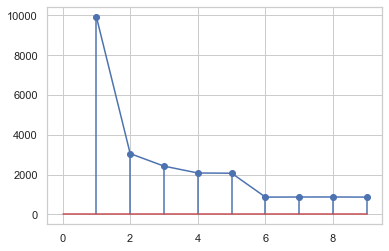

In [65]:
Series = []
meters=[]
for i in range(len(A)):
    serie=A.iloc[i,:-1]
    Series.append(serie)
    meters.append(A.index[i])
distances = graph_best_n(Series,10)

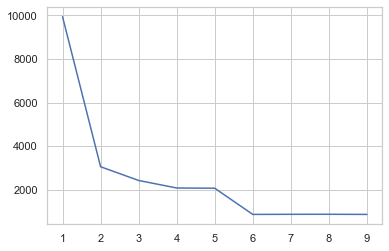

In [68]:
plt.plot(distances)

### Extracting dataframes from clusters

In [36]:
num_clusters = 6
centroids, indicesTimeSeries = k_means_clust(Series.copy(),num_clusters,5,20)
indicesTimeSeries

{2: [0, 40, 69, 77, 83, 96],
 1: [1,
  5,
  12,
  13,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  42,
  43,
  44,
  45,
  49,
  52,
  74,
  81],
 5: [2,
  7,
  8,
  10,
  14,
  15,
  48,
  50,
  51,
  53,
  55,
  56,
  58,
  60,
  62,
  64,
  65,
  68,
  72,
  73,
  75,
  78,
  80,
  82,
  87,
  88,
  89,
  91,
  95],
 3: [3, 11, 98],
 4: [4,
  6,
  9,
  41,
  46,
  54,
  57,
  61,
  63,
  66,
  71,
  76,
  84,
  86,
  90,
  92,
  93,
  94,
  97,
  100],
 0: [30, 47, 59, 67, 70, 79, 85, 99]}

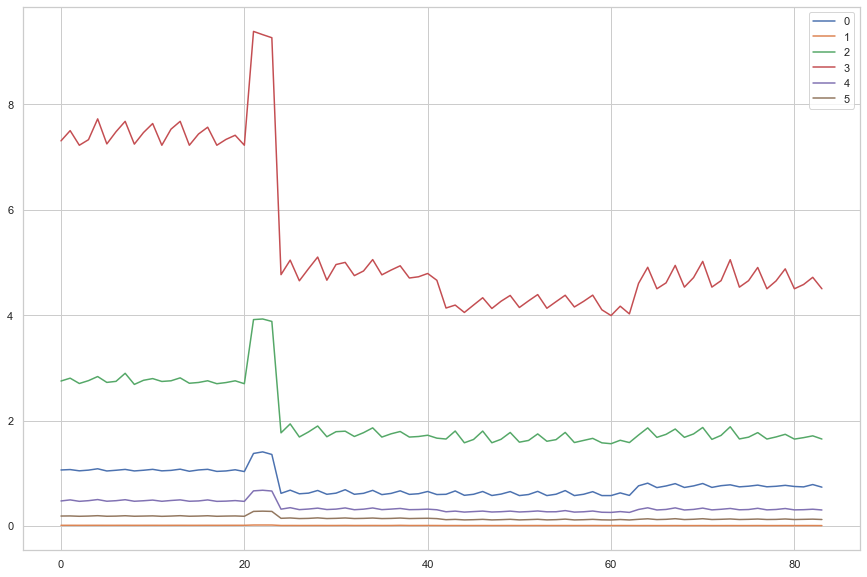

In [37]:
graph_centroids(centroids)

In [38]:
meters = np.array(meters)
df_clust = get_df_clust(indicesTimeSeries, meters)
df_clust

{2:         medidor       fecha  lectura_id_orig  voltajeA  voltajeB  voltajeC  \
 0      15029828  2019-04-04          1143130  114.6726  114.8017  115.2943   
 1      15029828  2019-04-04          1143509  114.6649  114.8677  114.8779   
 2      15029828  2019-04-04          1143880  114.8444  115.3403  115.6252   
 3      15029828  2019-04-04          1144272  114.6778  114.8357  114.4145   
 4      15029828  2019-04-04          1144628  116.9224  117.2767  117.0052   
 5      15029828  2019-04-04          1145053  114.1925  114.8132  115.2102   
 6      15029828  2019-04-05          1148042  116.4599  116.4413  116.5216   
 7      15029828  2019-04-05          1149035  114.3455  114.0721  113.9389   
 8      15029828  2019-04-05          1149560  117.0340  116.8882  117.2858   
 9      15029828  2019-04-05          1149951  117.3378  117.1492  117.3656   
 10     15029828  2019-04-05          1150347  115.3972  116.1736  115.6301   
 11     15029828  2019-04-06          1153513  11

In [162]:
df_clust_1 = df_clust[0]
df_clust_1

,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,angvoltajeA,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
fecha,,,,,,,,,,,,,,,,,,,,,
2019-04-04,16951195,1144470,131.1776,135.3792,130.8108,0.6587,0.6934,0.7266,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04,16951195,1144851,133.9596,137.8957,133.4545,0.6524,0.6936,0.5652,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1147867,140.3635,141.6350,140.0772,0.7903,0.5775,0.4591,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1147877,138.8720,140.6318,138.6239,0.7910,0.7793,0.6989,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1148287,133.8128,137.1472,133.9644,0.6748,0.8985,0.8726,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1148709,134.1632,136.5118,132.4462,0.8171,0.8173,0.9737,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149157,131.0713,147.2544,128.0932,0.5351,0.7014,0.5711,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149602,136.2667,138.2841,134.8930,0.7631,0.6948,1.0232,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149992,138.3548,140.2448,137.9814,0.4678,0.5882,0.4736,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:

df_clust_1_consumo = df_clust_1[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()


df_clust_2 = df_clust[1]
df_clust_2_consumo = df_clust_2[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_3 = df_clust[2]
df_clust_3_consumo = df_clust_3[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_4 = df_clust[3]
df_clust_4_consumo = df_clust_4[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_5 = df_clust[4]
df_clust_5_consumo = df_clust_5[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_6 = df_clust[5]
df_clust_6_consumo = df_clust_6[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

#df_clust_7 = df_clust[6]
#df_clust_7 = df_clust_7[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()



In [163]:
display(df_clust_1_consumo, df_clust_2_consumo, df_clust_3_consumo,df_clust_4_consumo,df_clust_5_consumo,df_clust_6_consumo)

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
16951195,0.810367,0.813806,0.771893,0.802546,0.830968,0.784358,0.801069,0.827638,0.785098,0.797946,...,0.434223,0.444268,0.468465,0.435781,0.443781,0.473814,0.434680,0.450083,0.487950,0.435505
20037205,0.700976,0.716979,0.689969,0.730024,0.790648,0.689969,0.731855,0.791388,0.695091,0.727995,...,0.743846,0.743846,0.768647,0.743846,0.752106,0.764126,0.743846,0.750150,0.758443,0.743846
35925506,1.019553,1.025696,1.025463,1.034213,1.030463,1.029142,1.028606,1.029803,1.028731,1.027892,...,0.797186,0.791650,0.798239,0.800239,0.795061,0.796275,0.795275,0.782597,0.790686,0.791365
52073198,1.023084,1.017950,1.007710,0.989170,1.044025,1.009794,0.989170,0.989170,0.989170,1.010254,...,0.638812,0.677601,0.677784,0.658941,0.638812,0.638812,0.712390,0.638812,0.682837,0.651566
52073218,1.813899,1.920592,1.786668,1.815417,1.895522,1.786668,1.814935,1.897164,1.786668,1.814417,...,1.029428,1.055337,1.137156,1.029428,1.058480,1.159923,1.029428,1.057230,1.153084,1.029428
52073348,0.789472,0.790257,0.790704,0.790775,0.766133,0.815953,0.791311,0.790829,0.791865,0.789579,...,0.554534,0.553534,0.554355,0.554123,0.552570,0.553730,0.553105,0.554944,0.555766,0.553373
53307861,1.076629,1.062853,1.101561,1.087566,1.107418,1.039300,1.082281,1.100476,1.050759,1.083089,...,0.626031,0.648272,0.667414,0.626031,0.651861,0.659418,0.626031,0.650999,0.660619,0.626031
58706740,1.259205,1.207852,1.191982,1.222253,1.211274,1.187096,1.211669,1.153448,1.220447,1.201301,...,1.107940,1.117413,1.122772,1.092553,1.124989,1.115980,1.094204,1.040775,1.191560,1.052804


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,0.112068,0.112826,0.112076,0.112063,0.112699,0.112089,0.112063,0.112090,0.112087,0.112704,...,0.021973,0.021456,0.021846,0.022128,0.021990,0.023555,0.028563,0.034310,0.023765,0.021461
15029974,0.015291,0.015362,0.015373,0.015180,0.015224,0.014672,0.015093,0.015110,0.014679,0.014811,...,0.007902,0.008039,0.007994,0.007894,0.008090,0.008273,0.008001,0.008868,0.008512,0.007978
16567738,0.002313,0.002369,0.002276,0.002276,0.002484,0.002276,0.002276,0.002532,0.002276,0.002398,...,0.001501,0.001501,0.001695,0.001501,0.001594,0.001611,0.001501,0.001572,0.001630,0.001501
16567740,0.000923,0.000951,0.000910,0.000991,0.000965,0.000910,0.000934,0.000959,0.000910,0.000931,...,0.000647,0.000684,0.000723,0.000647,0.000647,0.000758,0.000647,0.000678,0.000689,0.000647
16567757,0.004324,0.004320,0.004339,0.004331,0.004380,0.004326,0.004386,0.004459,0.004331,0.004312,...,0.002570,0.002631,0.002623,0.002643,0.002612,0.002681,0.002482,0.002555,0.002591,0.002530
16567758,0.010090,0.010232,0.010007,0.010073,0.010208,0.010004,0.010090,0.010101,0.010153,0.010078,...,0.006657,0.006757,0.006753,0.006819,0.006740,0.006879,0.006656,0.006709,0.006856,0.006649
16567759,0.010464,0.010730,0.010122,0.010456,0.010888,0.010122,0.010425,0.010504,0.010122,0.010388,...,0.005356,0.005656,0.006047,0.005356,0.005661,0.005843,0.005356,0.005582,0.005848,0.005356
16567760,0.015472,0.015703,0.015270,0.015457,0.015735,0.015286,0.015398,0.015754,0.015287,0.015461,...,0.010178,0.010339,0.010600,0.010176,0.010291,0.010606,0.009896,0.010339,0.010598,0.010164
16567761,0.005558,0.005643,0.005506,0.005553,0.005639,0.005504,0.005551,0.005644,0.005506,0.005544,...,0.003598,0.003647,0.003744,0.003598,0.003649,0.003745,0.003593,0.003635,0.003719,0.003590


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,2.252374,2.357075,2.226056,2.270535,2.260491,2.230750,2.299423,2.533563,2.232496,2.313309,...,0.765576,0.751020,0.757962,0.740724,0.742219,0.746466,0.739439,0.741381,0.749790,0.734983
16951212,3.089873,3.189435,3.085822,3.087325,3.147343,3.127165,3.102188,3.206969,3.038857,3.089325,...,1.866740,1.929037,2.059327,1.866740,1.912743,2.057158,1.866740,1.920773,2.011060,1.866740
52073201,3.535137,3.460552,3.421987,3.493027,3.529403,3.501183,3.370103,3.572649,3.370103,3.443013,...,1.828572,1.869155,2.117798,1.828572,1.921850,1.958023,1.828572,1.848152,1.830384,1.834913
52073321,2.445326,2.464383,2.429413,2.521015,2.713916,2.429413,2.536136,2.718844,2.429413,2.525230,...,2.220135,2.251016,2.272187,2.220135,2.232026,2.259471,2.220135,2.231435,2.260264,2.220135
53307830,3.025124,3.165316,2.923824,3.007303,3.173851,2.923824,3.013892,3.180029,2.923824,3.061766,...,2.018178,2.077694,2.156762,2.018178,2.070158,2.133317,2.018178,2.067712,2.127281,2.018178
58706706,2.150637,2.186672,2.130049,2.163619,2.184511,2.129781,2.138834,2.166119,2.118906,2.148780,...,1.204011,1.228528,1.260955,1.218242,1.253170,1.277401,1.215260,1.242384,1.277633,1.219796


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029846,6.179371,6.366855,5.996794,6.183830,6.348742,5.996794,6.162876,6.362190,5.996794,6.178939,...,3.922855,4.009784,4.226512,3.830326,4.010203,4.224307,3.830326,4.009038,4.178795,3.830326
16567733,6.340910,6.353298,6.319486,6.351068,6.471302,6.319486,6.557616,6.807530,6.319486,6.523377,...,3.309887,3.541580,3.792223,3.309887,3.529527,3.772828,3.309887,3.325485,3.338074,3.309887
58706725,9.402459,9.784338,9.356246,9.454796,10.354050,9.431815,9.720305,9.864157,9.419244,9.693734,...,6.361228,6.411351,6.695752,6.361228,6.409369,6.638075,6.361228,6.409387,6.636308,6.361228


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029847,0.441687,0.447774,0.436266,0.449917,0.478297,0.436266,0.447972,0.465813,0.436266,0.448732,...,0.332900,0.340523,0.344213,0.332900,0.338171,0.344519,0.332900,0.338443,0.344816,0.332900
15029977,0.605944,0.603994,0.590609,0.606425,0.602072,0.591389,0.598201,0.619000,0.581730,0.596809,...,0.381490,0.393326,0.391094,0.381875,0.394623,0.396995,0.382716,0.390901,0.390653,0.372563
15842894,0.370658,0.401633,0.364942,0.368264,0.394744,0.364942,0.368696,0.396037,0.364942,0.369327,...,0.229141,0.232841,0.267148,0.229141,0.234614,0.270708,0.229141,0.230807,0.233710,0.229141
16951216,0.857709,0.870523,0.830250,0.863947,0.918303,0.830250,0.879784,0.896664,0.830250,0.836150,...,0.000000,0.049974,0.118502,0.000000,0.008212,0.147668,0.000000,0.036418,0.000008,0.000000
17548289,0.413135,0.430361,0.408265,0.413313,0.445851,0.408265,0.412066,0.432062,0.408265,0.411956,...,0.249546,0.255607,0.278906,0.249546,0.256864,0.290106,0.249546,0.255237,0.265587,0.249546
35924882,0.389531,0.404816,0.379861,0.388308,0.405414,0.379861,0.388852,0.406432,0.379861,0.388950,...,0.238536,0.246750,0.264535,0.238536,0.247152,0.266232,0.238536,0.246804,0.263607,0.238536
35925294,0.521222,0.528035,0.505241,0.535168,0.534097,0.505241,0.536409,0.564676,0.505241,0.529758,...,0.553846,0.538963,0.539356,0.536329,0.553989,0.561605,0.551498,0.540499,0.539016,0.520124
35946920,0.490447,0.567712,0.490447,0.516142,0.542534,0.490447,0.490447,0.542641,0.490447,0.516124,...,0.385343,0.385343,0.437056,0.385343,0.450912,0.409932,0.385343,0.386861,0.388254,0.385343
41175730,0.308770,0.338711,0.308770,0.315587,0.332260,0.308770,0.317355,0.332872,0.308770,0.318096,...,0.190895,0.197649,0.203497,0.190895,0.194707,0.205220,0.190895,0.196386,0.209778,0.190895


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029844,0.082441,0.083936,0.080859,0.082237,0.083717,0.080859,0.082625,0.083897,0.080859,0.082382,...,0.094853,0.095986,0.098260,0.094853,0.096612,0.098066,0.094853,0.096452,0.098298,0.094853
15842884,0.240687,0.253847,0.248588,0.238955,0.253043,0.245355,0.237662,0.263071,0.243283,0.244738,...,0.128687,0.118230,0.143327,0.124028,0.120335,0.128682,0.125238,0.118230,0.143017,0.122800
15842885,0.128151,0.129104,0.124035,0.128213,0.137191,0.124035,0.128379,0.135390,0.124035,0.128671,...,0.110620,0.114688,0.115741,0.110620,0.111046,0.111464,0.110620,0.111143,0.111440,0.110620
15842921,0.147808,0.151389,0.146472,0.149369,0.153033,0.145364,0.145791,0.143852,0.152095,0.146957,...,0.074523,0.077789,0.081486,0.074523,0.079018,0.079668,0.074523,0.076354,0.079377,0.076284
16567743,0.221115,0.230739,0.218496,0.221276,0.230275,0.218496,0.218496,0.233189,0.218496,0.220708,...,0.129872,0.132592,0.141632,0.129872,0.132615,0.155824,0.129872,0.132543,0.141533,0.129872
16567746,0.212526,0.217497,0.206649,0.212553,0.217531,0.206649,0.212477,0.219183,0.206649,0.212356,...,0.136611,0.142445,0.148338,0.136611,0.142506,0.148192,0.136611,0.142325,0.147995,0.136611
20037214,0.103132,0.099763,0.094244,0.096143,0.128773,0.114670,0.105112,0.133403,0.107795,0.112411,...,0.036764,0.045133,0.068688,0.036764,0.045746,0.119025,0.036764,0.037744,0.038011,0.037216
28877074,0.072170,0.074268,0.068965,0.072103,0.074042,0.068965,0.072031,0.073945,0.068965,0.072200,...,0.053092,0.056124,0.058169,0.053092,0.056169,0.058464,0.053092,0.056990,0.058673,0.053092
35924863,0.186301,0.187824,0.185592,0.198658,0.209564,0.185592,0.195631,0.205537,0.185592,0.192953,...,0.117973,0.118540,0.119951,0.117973,0.121277,0.126330,0.117973,0.118313,0.118625,0.117973


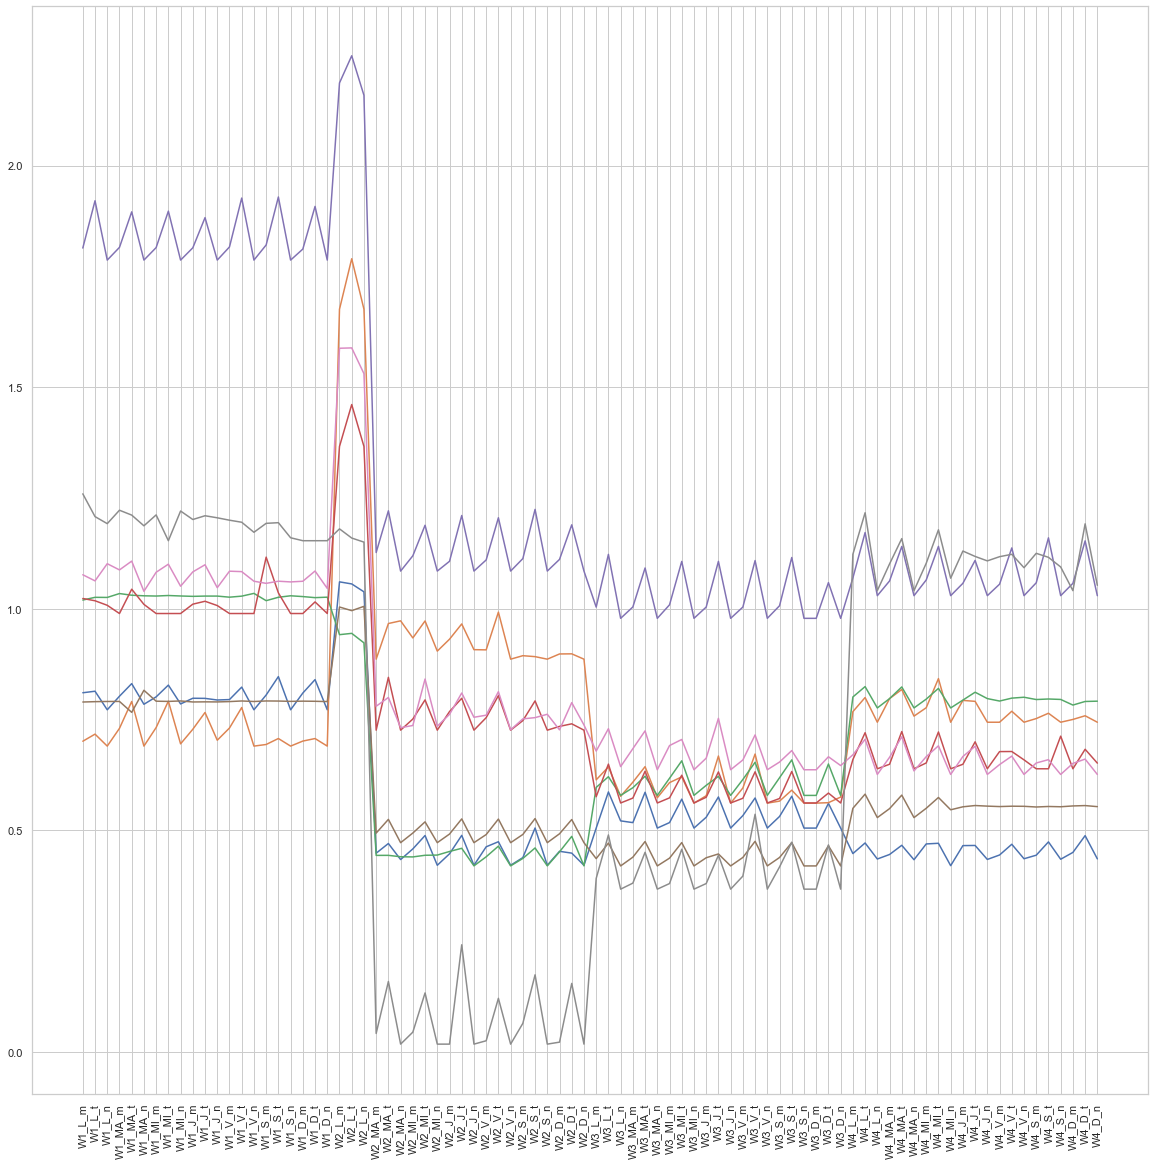

In [53]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_1_consumo)):
    fila=df_clust_1_consumo.iloc[i,:]
    plt.plot(fila)

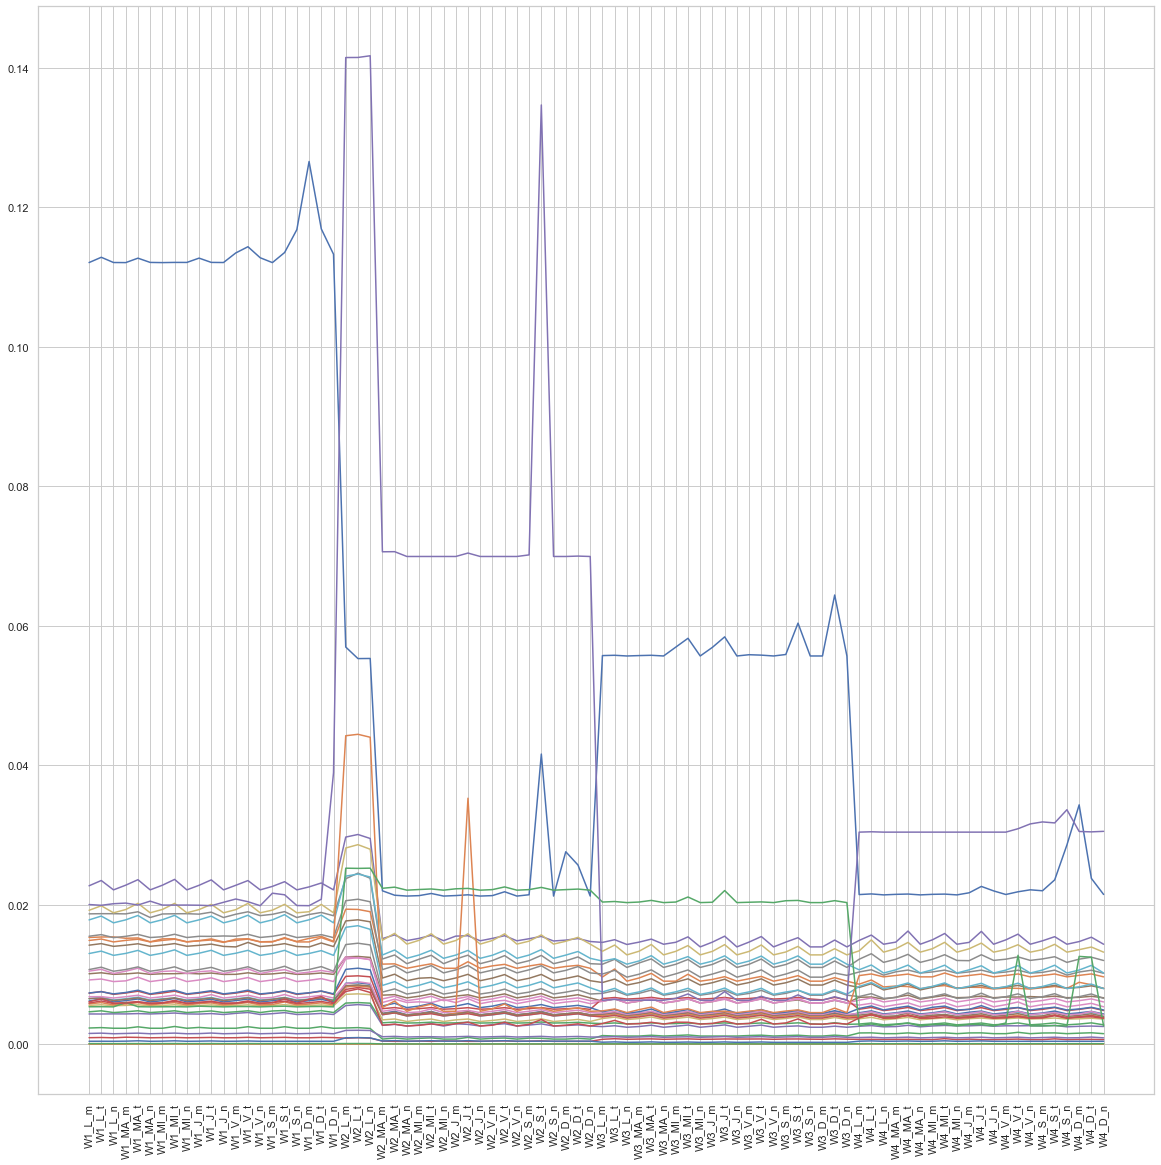

In [54]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_2_consumo)):
    fila=df_clust_2_consumo.iloc[i,:]
    plt.plot(fila)

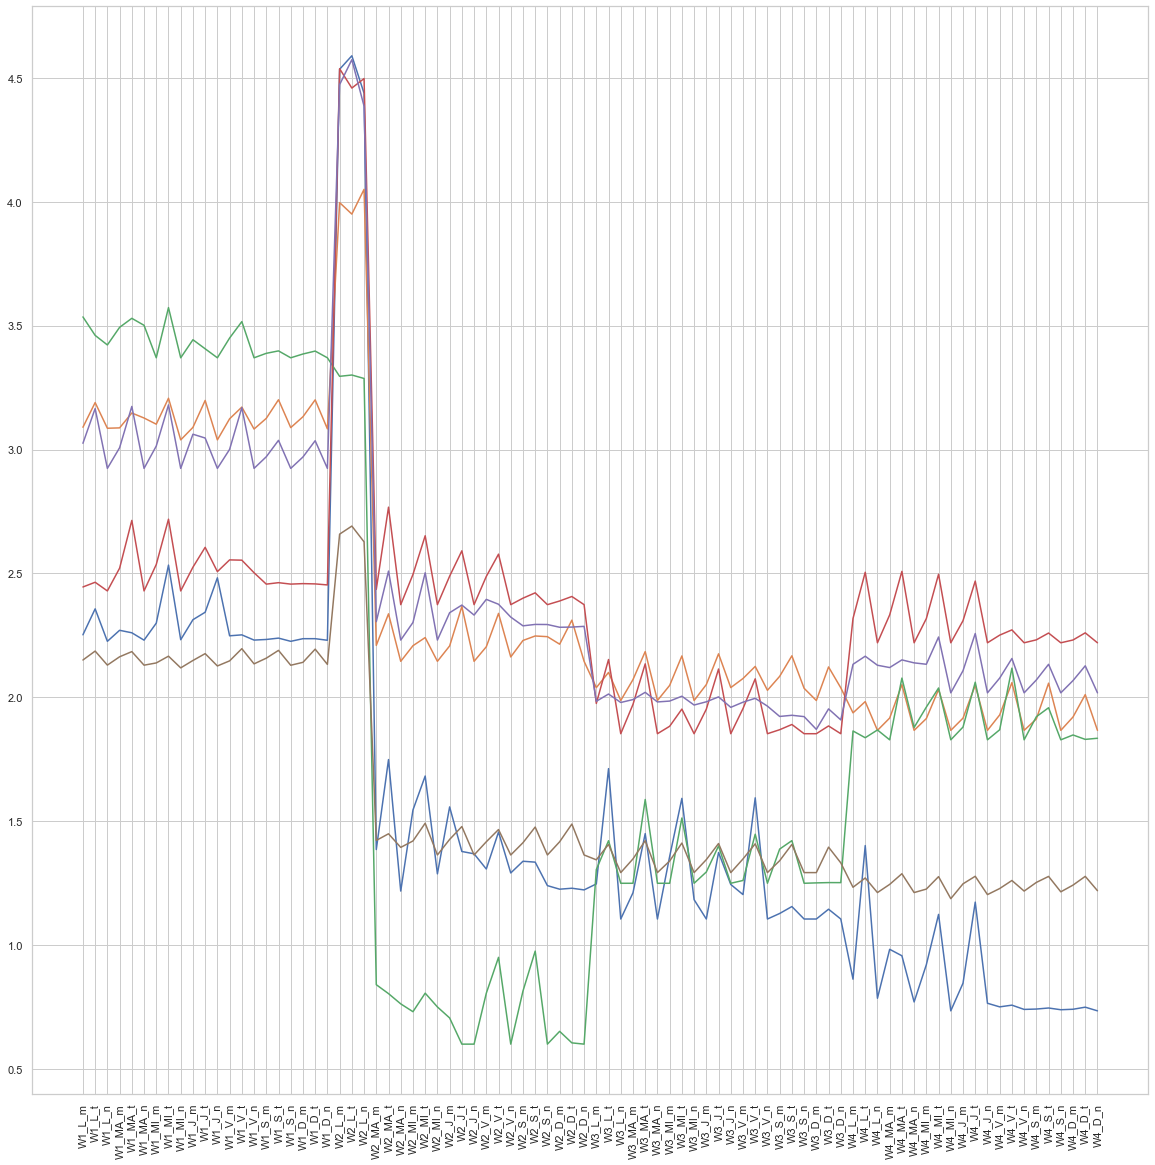

In [55]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_3_consumo)):
    fila=df_clust_3_consumo.iloc[i,:]
    plt.plot(fila)

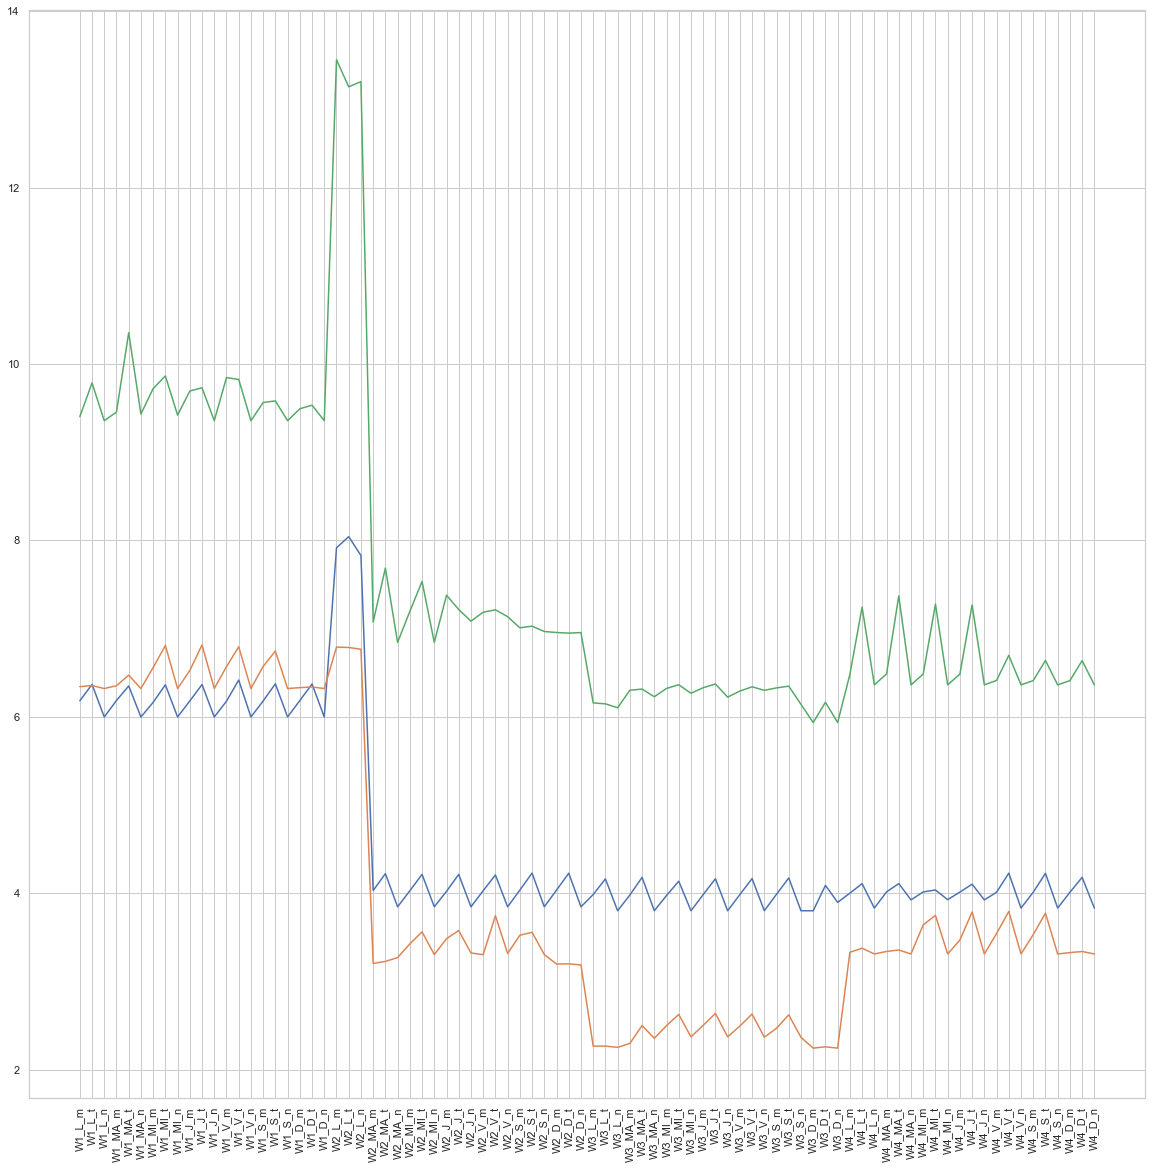

In [56]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_4_consumo)):
    fila=df_clust_4_consumo.iloc[i,:]
    plt.plot(fila)

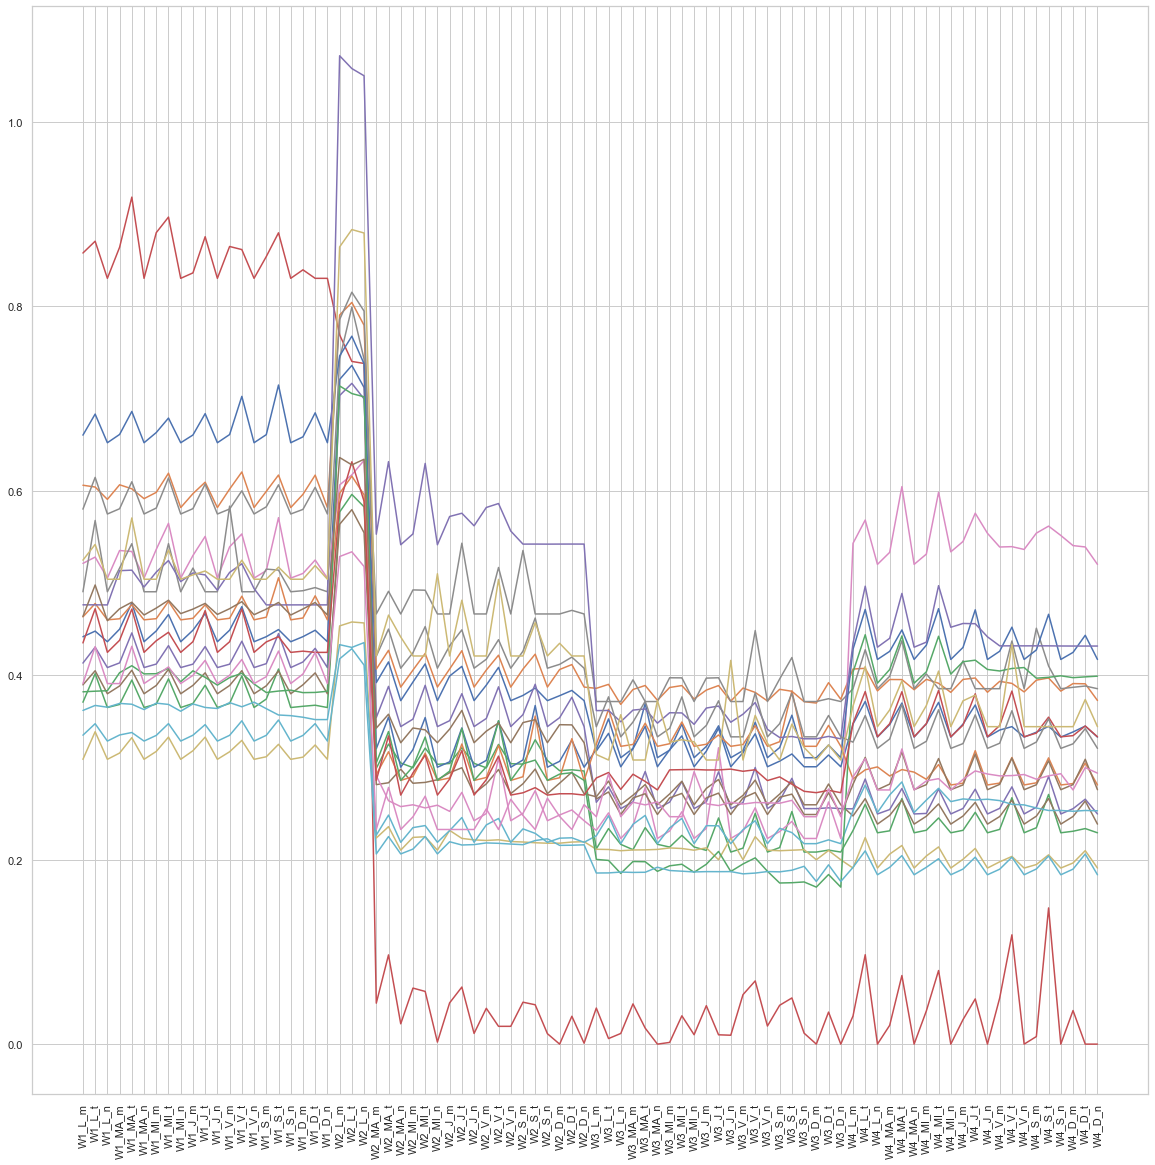

In [57]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_5_consumo)):
    fila=df_clust_5_consumo.iloc[i,:]
    plt.plot(fila)

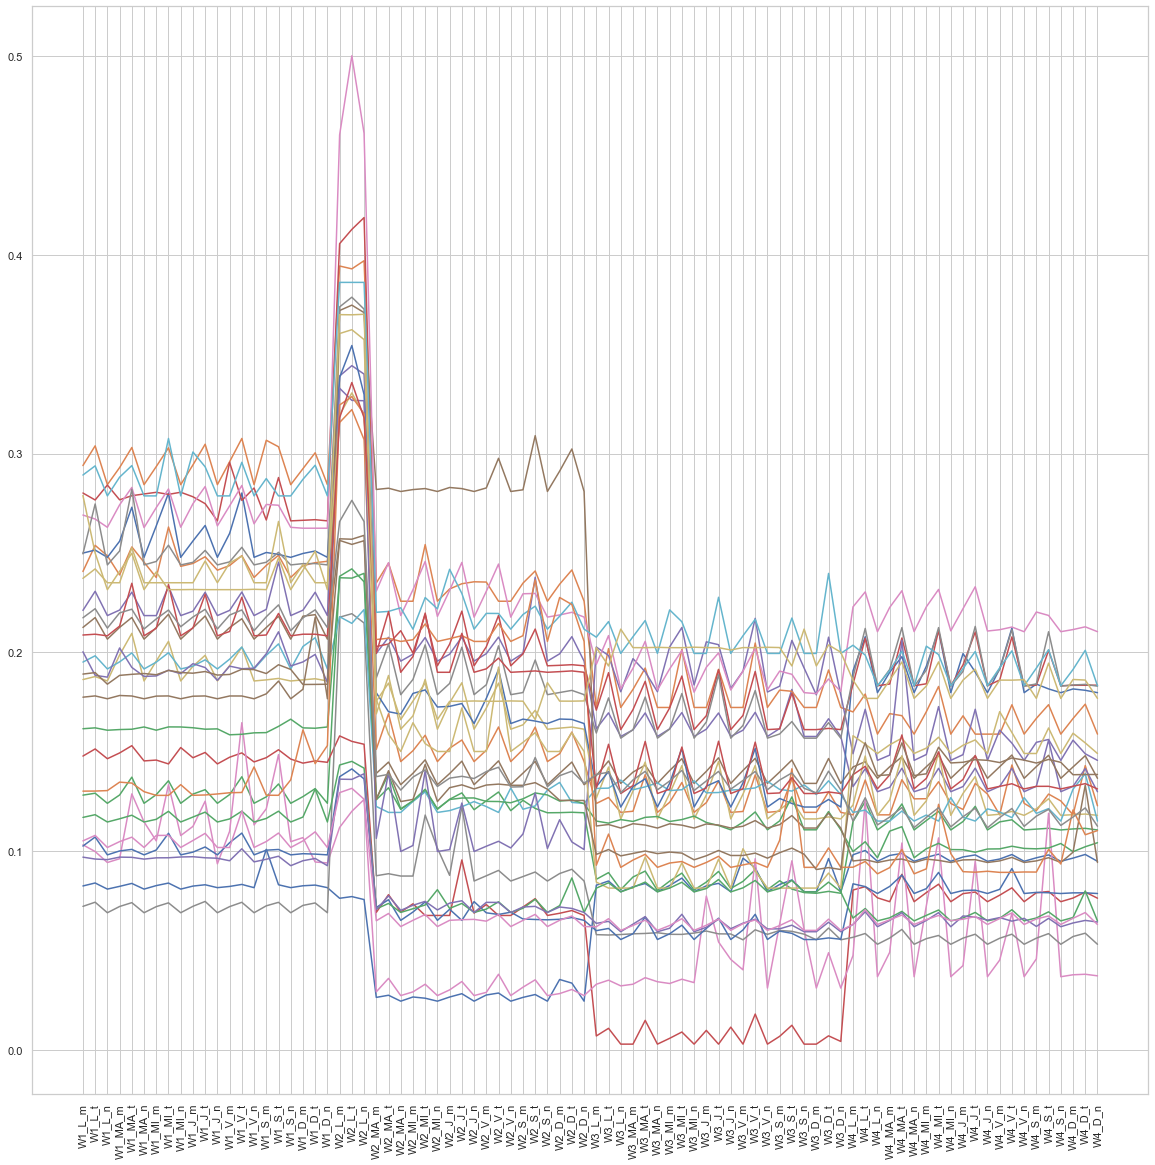

In [58]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_6_consumo)):
    fila=df_clust_6_consumo.iloc[i,:]
    plt.plot(fila)

### First cluster

In [78]:
df_clust_1

,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,angvoltajeA,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
fecha,,,,,,,,,,,,,,,,,,,,,
2019-04-04,16951195,1144470,131.1776,135.3792,130.8108,0.6587,0.6934,0.7266,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04,16951195,1144851,133.9596,137.8957,133.4545,0.6524,0.6936,0.5652,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1147867,140.3635,141.6350,140.0772,0.7903,0.5775,0.4591,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1147877,138.8720,140.6318,138.6239,0.7910,0.7793,0.6989,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1148287,133.8128,137.1472,133.9644,0.6748,0.8985,0.8726,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1148709,134.1632,136.5118,132.4462,0.8171,0.8173,0.9737,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149157,131.0713,147.2544,128.0932,0.5351,0.7014,0.5711,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149602,136.2667,138.2841,134.8930,0.7631,0.6948,1.0232,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05,16951195,1149992,138.3548,140.2448,137.9814,0.4678,0.5882,0.4736,A3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_clust_1["CLASIFICACION"].value_counts()

ENTIDAD PUBLICA       595
COMISARIATO           351
AVICOLA               320
ESTACION DE BOMBEO    180
SECADORA DE MAIZ      161
ENTIDAD PRIVADA       141
Name: CLASIFICACION, dtype: int64

### Second cluster

In [80]:
df_clust_2["CLASIFICACION"].value_counts()

SUBESTACION                9615
IGLESIA                     539
PROCESAMIENTO DE FRUTAS     340
PILADORA                    184
SALON DE EVENTOS            178
COMERCIAL                   165
Name: CLASIFICACION, dtype: int64

### Third cluster

In [81]:
df_clust_3["CLASIFICACION"].value_counts()

COMISARIATO          696
ENTIDAD PRIVADA      345
PILADORA             319
ENTIDAD MUNICIPAL    244
Name: CLASIFICACION, dtype: int64

### Fourth cluster

In [82]:
df_clust_4["CLASIFICACION"].value_counts()

ESTACION DE BOMBEO      365
EXTRACCION DE ACEITE    288
ENTIDAD PRIVADA         239
Name: CLASIFICACION, dtype: int64

 ### Fifth cluster 

In [83]:
df_clust_5["CLASIFICACION"].value_counts()

ENTIDAD PRIVADA               1184
ESTACION DE BOMBEO             372
PILADORA                       363
BANCO                          350
VENTA DE ELECTRODOMESTICOS     345
FARMACIA                       324
CLINICA                        239
ENTIDAD PUBLICA                183
COMERCIAL                      182
COMISARIATO                    182
SECADORA DE MAIZ               180
PANADERIA                      179
CULTIVOS AGRICOLAS             175
EMPACADORA DE BANANO           112
Name: CLASIFICACION, dtype: int64

### Sixth cluster

In [84]:
df_clust_6["CLASIFICACION"].value_counts()

ESTACION DE BOMBEO       2158
ENTIDAD CREDITICIA        688
IGLESIA                   686
SECADORA DE MAIZ          593
ENTIDAD PRIVADA           408
PILADORA                  370
VENTA DE AGROQUIMICOS     356
COMERCIAL                 355
ENTIDAD PUBLICA           343
FARMACIA                  229
ENVASADORA DE AGUA        184
CONCESIONARIA             184
CULTIVOS AGRICOLAS        183
LUBRICADORA               182
CENTRO DE SALUD           181
FUMIGACION AEREA          180
COMISARIATO               177
GASOLINERA                164
INGENIO AZUCARERO         156
HOTEL                     113
Name: CLASIFICACION, dtype: int64

In [62]:
from dtaidistance import clustering
from dtaidistance import dtw

In [64]:

# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(Series.copy())
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(Series.copy())
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(Series.copy())

Exception: Type of series not supported, expected numpy.array or array.array but got <class 'pandas.core.series.Series'>